# Iniciando

[**scikit-image**](http://scikit-image.org) es un paquete de procesamiento de imágenes de Python que funciona con arreglos **numpy**. Este paquete es importado como **skimage**:

In [9]:
import skimage

La mayoria de las funciones de **skimage** se encuentran en los submodulos:

In [10]:
from skimage import data
camera = data.camera()

Una lista de los submódulos y funciones se encuentra en la página de **referencia de la API**. 

Dentro de scikit-image, las imágenes se representan como arreglos de Numpy, por ejemplo arreglos 2-D para imágenes 2-D en escala de grises.

In [11]:
type(camera)

numpy.ndarray

In [12]:
#Una imágen con 512 filas y 512 columnas
camera.shape

(512, 512)

El submódulo **skimage.data** provee un conjunto de funciones que regresan imágenes de ejemplo, estas pueden ser usadas para empezar a usar las funciones de scikit-image:

In [13]:
coins = data.coins()
from skimage import filters
threshold_value = filters.threshold_otsu(coins)
threshold_value

107

Por supuesto, también es posible cargar tus propias imágenes como arreglos NumPy de archivos de imagen, usando **skimage.io.imread()**

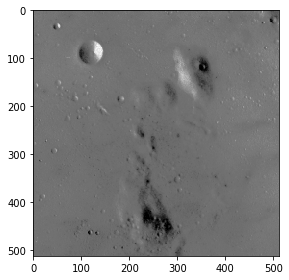

In [4]:
import os
filename = os.path.join(skimage.data_dir, 'moon.png')
from skimage import io
moon = io.imread(filename)
io.imshow(moon)
io.show()

# Un curso rápido de NumPy para imágenes

Las imágenes manipuladas por **scikit-image** son simplemente arreglos de NumPy. Por lo tanto, una gran fraccion de las operaciones en imágenes tan solo consistiran en usar NumPy:

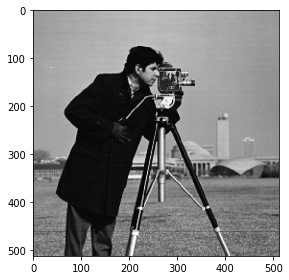

In [15]:
from skimage import data
camera = data.camera()
type(camera)
io.imshow(camera)
io.show()

Obteniendo la geometría de la imágen y el número de pixeles:

In [16]:
camera.shape

(512, 512)

In [17]:
camera.size

262144

Obteniendo información estadistica de los valores de grises

In [18]:
camera.min(), camera.max()

(0, 255)

In [19]:
camera.mean()

118.31400299072266

Los arreglos de NumPy representando imágenes pueden ser de diferentes tipos numéricos de entero o flotante. Ver [**Tipos de datos en imágenes y su significado**](#tpimg) par más informacion  sobre estos tipos y como scikit-image los trata.

## Indexado en NumPy

Los indices en NumPy pueden ser usadoas para ver valores de pixeles y modificar valores:

In [20]:
#Obtener el valor del pixel en la fila 10 y columna 20
camera[10, 20]

153

In [21]:
#Poner en negro el valor del pixel en la fila 3 y columna 10
camera[3, 10] = 0

Ten cuidado: en los indices de NumPy, la primera dimensión (**camera.shape[0]**) corresponde a las filas, mientras que la segunda (**camera.shape[1]**) corresponde a las columnas, con el origen (**camer[0, 0]**) en la esquina superior izquierda. Esto concuerda con la notacion de algebra matricial/lineal, pero es contrario a las coordenas Cartesianas(x, y). Ver [**Conversion de coordenadas**](#coo) para más detalles.

Más allá de pixeles individuales, es posible acceder/modificar los valores de conjuntos completos de pixeles, usando las diferentes posibilidades de indexado en NumPy.

Cortar:

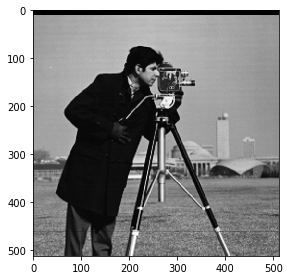

In [22]:
#Poner en negro las diez primeras lineas
camera[:10] = 0
io.imshow(camera)
io.show()

Mascaras (indexado con mascaras booleanas):

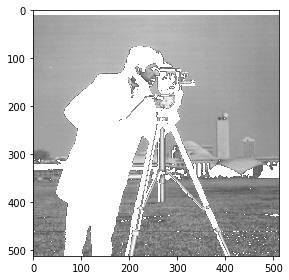

In [23]:
mask = camera < 87
# Poner en "blanco" (255) los pixeles donde es Verdadero
camera[mask] = 255
io.imshow(camera)
io.show()

Indexado complejo (indexado con conjuntos de indices)

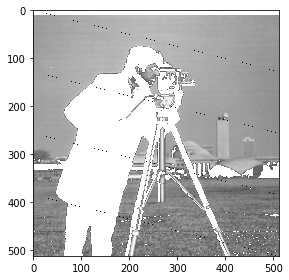

In [24]:
import numpy as np
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0
io.imshow(camera)
io.show()

Usando mascaras, especialmente, es muy util para seleccionar un conjunto de pixeles en los cuales hacer más manipilaciones. La mascara puede ser cualquier arreglo booleano con la misma forma que la imágen(o forma que se pueda trasnformar a la de la imágen). Esto puede ser útil para definir una región de interes, como un disco:

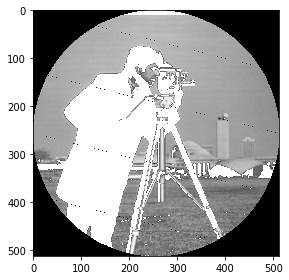

In [25]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows/2, ncols/2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0
io.imshow(camera)
io.show()

La aritmética booleana puede ser utilizada para definir mascaras más complejas:

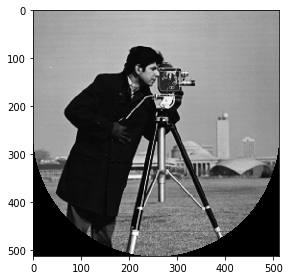

In [26]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera = data.camera()
camera[lower_half_disk] = 0
io.imshow(camera)
io.show()

## Imágenes a color

Todo lo anterior también es verdad para imágenes a color: una imágen a color es un arreglo de NumPy, con una dimensión adicional para los canales:

In [27]:
cat = data.chelsea()
type(cat)

numpy.ndarray

In [28]:
cat.shape

(300, 451, 3)

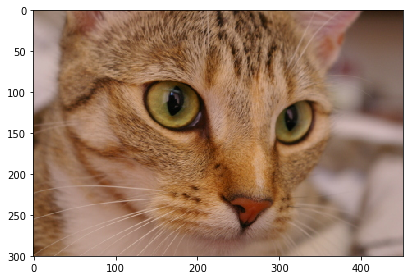

In [29]:
io.imshow(cat)
io.show()

Esto muestra que **cat** es una imágen de 300-por-451 pixeles con tres canales(rojo, verde, y azul).
Como antes, podemos obtener y asignar valores de pixeles:

In [30]:
cat[10, 20]

array([151, 129, 115], dtype=uint8)

In [31]:
#Poner el pixel en la fila 50, columna 60 en negro
cat[50,60] = 0
#poner el pixel en la fila 50 columna 61 en verde
cat[50,61] = [0, 255, 0] # [rojo, verde, azul]

Tambén podemos usar mascaras booleanas 2D para una imágen 2D a color, como lo hicimos con la imágen en escala de grises:

Usando una mascara 2D en una imágen 2D a color

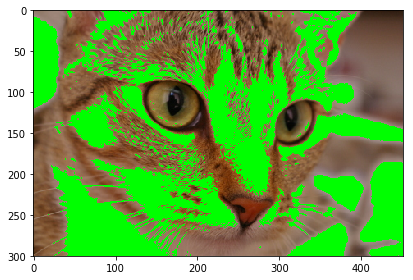

In [32]:
from skimage import data
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
io.imshow(cat)
io.show()

<a id="coo"></a>
## Conversion de coordenadas

Porque podemos representar imagenes como arreglos NumPy, nuestras coordenadas deben ser acorde. Imágenes bi-dimensionales (2D) en escalas de grises (como **camera** arriba) están indexadas por fila y columna (abreviado a **(fila, col)** o **(f, c)**), con el elemento más bajo **(0,0)** en la esquina superior izquierda. En varias partes de la librería también verás **rr** y **cc** refiriendose a listas de coordenadas de filas y columnas. Diferenfciamos esto de **(x,y)**, que comunmente denote coordenadas Cartesianas estandar, donde **x** es la coordinada horizontal, **y** la vertical, y el origen está en la esquina inferior izquierda. (Matplotlib, por ejemplo, usa esta conversion.)

En el caso de imágenes a color (o multicanal), la última dimensión contiene la información del color y es denotada como **channel** o **ch**.

Finalmente, para imágenes 3D, como videos, scans imágenes de resonancia magnética (MRI) o microscopia confocal, nos referimos a la primera dimensión como plano, abreviado como **pln** o **p**.

Estas conversiones estan resumidas abajo:

 Tipo de imágen | Coordenadas     
 -------------- |:-------------:  
 2D grises      | (fila, col)     
 2D multicanal  | (fila, col, ch) 
 3D grises      | (pln, fila, col)
 3D multicanal  | (pln, fila, col, ch)

Muchas funciones en scikit-image operan en imágenes 3D  directamente:

In [48]:
im3d = np.random.rand(10, 100, 100)
from skimage import morphology
from scipy import ndimage as ndi
seeds = ndi.label(im3d < 0.1)[0]
ws = morphology.watershed(im3d, seeds)
type(ws)

numpy.ndarray

En muchos casos, la tercera dimensión de la imágen tiene resolución menor a las otras dos. Algunas funciones de scikit-image proporcionan el argumento **spacing** para procesar estas imágenes 

In [34]:
from skimage import segmentation
slics = segmentation.slic(im3d, spacing=[5, 1, 1], multichannel=False)

NameError: name 'im3d' is not defined

Otras veces, el procesamiento debe hacerse en el plano. Cuando los planos son la primera dimension, podemos usar la siguiente sintaxis:

In [ ]:
from skimage import filters
edges = np.zeros_like(im3d)
for pln, image in enumerate(im3d):
    #iterar sobre la primera dimension (planos)
    edges[pln] = filters.sobel(image)

## Notas en el orden de arreglos

Aunque los nombres de los ejes parece arbitrario, este puede tener un efecto significante en la velocidad de las operaciones. Esto es por que los procesadores modernos nunca obtinen sólo un elemento de la memoria, sino un bloque de elementos adyacentes. Por lo tanto, procesar elementos adyacentes entre si en memoria es más rápido que procesarlos en orden diferente, aun cuando el número de opreaciones es igual:

In [38]:
def in_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[0])):
        arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[2])):
        arr[:, :, plane] *= scalar

import time
im3d = np.random.rand(100, 1024, 1024)
t0 = time.time()
x = in_order_multiply(im3d, 5)
t1 = time.time()
print("%.2f segundos" % (t1 - t0))

0.12 segundos


In [39]:
im3d_t = np.transpose(im3d).copy() # poner la dimension "planes" al final
im3d_t.shape

(1024, 1024, 100)

In [40]:
s0 = time.time()
x = out_of_order_multiply(im3d, 5)
s1 = time.time()
print("%.2f segundos" % (s1 - s0))

2.07 segundos


In [41]:
print("Incremento de velocidad: %.1fx" % ((s1 - s0) / (t1 - t0)))  

Incremento de velocidad: 17.0x


## Una nota sobre tiempo

Aun que scikit-image aun (0.11) no proporciona funciones para trabajar específicamente con datos 3D con variacion de tiempo, nuestra comptaibilidad con arreglos NumPy nos permite trabajar de manera muy natural con un arreglo 5D de la forma (t, pln, fila, col, ch):

In [42]:
%%script false
for timepoint in image5d:  
   # each timepoint is a 3D multichannel image
   do_something_with(timepoint)

Despues podemos suplementar la tabla anterior con:

Tipo de imágen | Coordenadas     
 -------------- |:-------------:  
 2D video color       | (t, fila, col, ch)     
 2D video multicanal  | (t, pln, fila, col, ch) 

<a id="tpimg"></a>
# Tipos de datos en imágenes y su significado

En **skimage**, las imágenes son simplemente arreglos **numpy**, los cuales soportan una variedad de tipos de datos, ej. "dtipos". Para evitar distorcionar las intesidades de la imágen (ver [**Reescalando valores de intensidad**](#rvi), asumimos que la imágen usa los siguientes rangos de dtipos:

Tipo de dato | Rango     
 ----------- |:-------------:  
 uint8       | 0 a 255     
 uint16      | 0 a 65535
 uint32      | 0 a $2^{32}$  
 float       | -1 a 1 o 0 a 1
 int8        | -128 a 127     
 int16       | -32768 a 32767 
 int32       | $-2^{31}$ a $2^{31}$ - 1
 
 Nota que las imágenes flotantes están restringidas al rango -1 a 1 aun que el tipo de dato puede exceder este rango; todos los dtipos enteros, por otra parte, tienen intensidades de pixeles que abarcan el rango completo del tipo de datos. Con algunas excepciones *imágenes de 64-bit (u)int no están soportadas* 
 
 Las funciones en skimage están diseñadas para que acepten este tipo de datos, pero, por eficiencia, pueden regresar una imágen con un dtipo dfirente (ver [**Tipos de salida**](#tps). Si necesitas un dtipo particular, skimage provee funciones de utilidad que convierten dtipos y propiamente rescalan las intesidades de la imágen (ver [**Tipos de entrada**](#tpe). **Nunca debes** usar **astype** en una imagen, por que viola estos supuestos sobre el rango de los dtipos: 

In [43]:
from skimage import img_as_float
image = np.arange(0, 50, 10, dtype=np.uint8)
print(image.astype(np.float)) #estos valores estan fuera del rango

[ 0. 10. 20. 30. 40.]


In [44]:
print(img_as_float(image))

[0.         0.03921569 0.07843137 0.11764706 0.15686275]


<a id="tpe"></a>
## Tipos de entrada

Aunqun intentamos preservar el rango y tipo de las imágenes de entrada, las funciones pueden soportar sólo un subconjunto de estos tipos de datos. En estos casos, la entrada será convertida al tipo requerido (si es posible), y un mensaje de advertencia será impreso en el log si una copia de memoria es requerida.
Los requrimientos de tipos deben estar anotados en los docstrings.

Las siguientes funciones en el paquete principal están disponibles para desarrolladores y usuarios:

Nombre de la funcion| Descripcion     
 ------------------ |:-------------:  
 img_as_float       | Convierte a 64-bit punto flotante 
 img_as_ubyte       | Convierte a 8-bit uint
 img_as_uint        | Convierte a 16-bit uint
 img_as_int         | Convierte a 16-bit int

Estas funciones convierten las imágenes a el dtipo deseado y *apropiadamente reescala sus valores*. Si la conversion reduce la precision de la imágen, se manda una advertencia:

In [45]:
from skimage import img_as_ubyte
image = np.array([0, 0.5, 1], dtype=float)
img_as_ubyte(image)

/Users/jperalta/miniconda2/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


array([  0, 128, 255], dtype=uint8)

Las advertencias pueden ser ignoradas con un manejador de contexto:

In [46]:
import warnings
image = np.array([0, 0.5, 1], dtype=float)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    a = img_as_ubyte(image)
a    

array([  0, 128, 255], dtype=uint8)

Adicionalmente, algunas funciones toman un argumento **preserve_range** cuando una conversion de rango es conveniente pero no necesaria. Por ejemplo, interpolacion en **transform.warp** requiere una imágen de tipo flotante, que deberían tener un rango en [0, 1]. Entonces, por default, las imágenes de entrada serán reescaladas a este rango. Sin embargo, en algunos casos, los valores de la imágen representan mediciones fisicas, como temperatura o cantidad de lluvia, que el usuario no quiere reescalar. Con **preserve_range=Trure**, el rango original de los datos será preservado, aun cuando la salida es una imágen tipo flotante. Los usuarios deben asegurar que esta imágen no estandar es procesada propiamente por funciones mas abajo en el flujo, que pueden llegar a esperar una imágen en [0, 1].

In [47]:
from skimage import data
from skimage.transform import rescale
image = data.coins()
image.dtype, image.min(), image.max(), image.shape

(dtype('uint8'), 1, 252, (303, 384))

In [48]:
rescaled = rescale(image, 0.5)
(rescaled.dtype, np.round(rescaled.min(), 4), np.round(rescaled.max(), 4), rescaled.shape)

/Users/jperalta/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(dtype('float64'), 0.0147, 0.9456, (152, 192))

In [49]:
rescaled = rescale(image, 0.5, preserve_range=True)
(rescaled.dtype, np.round(rescaled.min()),  np.round(rescaled.max()), rescaled.shape)

(dtype('float64'), 4.0, 241.0, (152, 192))

<a id="tps"></a>
## Tipos de Salida

El tipo de salida de una función es determinada por el autor de la función y estáo documentada para el beneficio del usuario. Mientras que esto requiere que el usuario explicitamente convierta el las salidas al tipo que desee, esto garantiza que no se hacen copias de datos innecesarias.

Un usuario que requiere una salida con un tipo especifico (ej., para desplegar), puede escribir:

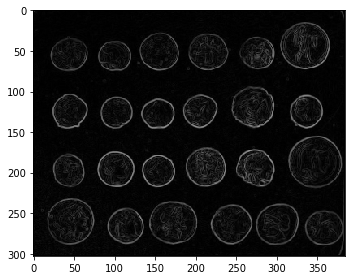

In [50]:
from skimage import img_as_uint
image = data.coins()
out = img_as_uint(filters.sobel(image))
io.imshow(out)
io.show()

## Trabajando con OpenCV

Es posible que neceites usar una imágen creada usando **skimage** con **OpenCV** o vice versa. Los datos de imágenes de OpenCV pueden ser accesados (sin copiar) en NumPy (y, por lo tanto, en scikit-image). OpenCV usa BGR (en lugar de RGB como scikit-image) para imágenes a color, y su dtipo por default es uint8 (Ver [**Tipos de datos en imágenes y su significado**](#tpimg)).

###Convirtiendo BGR a RGB y vice versa
Las imágenes a color en **skimge** y OpenCV tienen tres dimensiones: ancho, altura y color. RGB y BGR usan el mismo espacio de color, pero el orden de los colores está invertido.

Nota que en **scikit-image** usualemte nos referimos a **filas** y **columnas** en lugar de ancho y altura (Ver [**Conversion de coordenadas**](#coo)).

La siguiente instrucción invierte efectivamente el orden de los colores, dejando las filas y columnas sin afectar

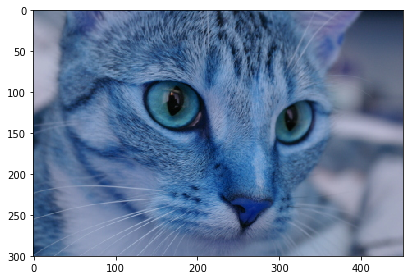

In [57]:
cat = data.chelsea()
cat = cat[:, :, ::-1]
io.imshow(cat)
io.show()

### Usando una imágen de OpenCV con *skimage*
Si cv_image es un arreglo de bytes sin signo, **skimage** lo entenderá por default, Si prefieres trabajar con imágenes de punto flotante, **img_as_float()** puede ser utulizado para convertir la imágen:

In [58]:
%%script false
from skimage import img_as_float
image = img_as_float(imagen_opencv)

### Usando un imágen de *skimage* en OpenCV
Lo opuesto puede ser logrado usando **img_as_ubyte()**:

In [59]:
%%script false
from skimage import img_as_ubyte
image = img_as_ubyte(imagen_skimage)

## Flujo de procesado de imagenes

El comportamiento de dtipo te permite concatenar cualquier funcion **skimage** sin preocuparte del dtipo de la imágen. Por otra parte, si quieres usar una funcion propia que requiere un dtipo en particular, deberás llamar una de las funciones de conversion de dtipos (aqui **func1** y **func2** son funciones de **skimage**)

In [60]:
%%script false
from skimage import img_as_float
image = img_as_float(func1(func2(image)))
imagen_procesada = funcion_propia(image)

O mejor aun, puedes convertir la imágen internamente y usar un flujo de procesamiento simplificado:

In [62]:
%%script false
def funcion_propia(image):
    image = img_as_float(image)
    #hacer algo
    
imagen_procesada = funcion_propia(func1(func2(image)))

<a id="rvi"></a>
## Reescalando valores de intensidad

Cuando posible, las funciones deben evadir ampliar ciegamente las intensidades de imágenes (ej. reescalar las intensidades de una imágen flotante para que el minimo y máximo sean 0 y 1), ya que esto puede distorcionar ampliamente la imágen. Por ejemplo, si estás buscando marcadores claros en una imágen obscura, puede haber una imágen que no tenga marcadores claros, estirando su intensidad para abarcar el rango completo haría que el ruido de fondo parecieran marcadores.

Sin embargo, algunas veces, tenemos imágenes que deberian ocupar el rango completo de intensidad pero no lo hacen. Por ejemplo, algunas cámaras guardan imágenes con 10, 12 o 14 bits de profundidad por pixel. Si estas se guardan en un arreglo con dtipo uint16, entonces la imágen no se extenderá sobre el rango completo de intensidad, por lo que aparecerá más obscura de lo que debería. Para corregir esto, se puede usar la funcion **rescale_intensity** para reescakar la imágen para que use el rango completo del dtipo:

In [64]:
%%script false
from skimage import exposure
image = exposure.rescale_intensity(img10bit, in_range(0,2**10-1))

Aquí el argumento **in_range** se pone en el valor máximo para una imágen de 10-bits. Por defualt, **rescale_intensity** estira los valore de **in_range** para que concurden con el rango del dtipo. **rescale_intensity** también acepta strings como entradas para **in_range** y **out_range**, por lo que el ejemplo anterior también puede ser escrito como:

In [65]:
%%script false
image = exposure.rescale_intensity(img10bit, in_range='uint10')

## Nota sobre valores negativos

Las personas muy comunmente representan las imágenes con dtipos con signo, aun que sólo manipulan los valores positivos de la imágen (ej., usando solo 0-127 como en una imágen int8). Por esta razon, las funciones de conversion sólo extiran los valores positivos de un dtipo con signo al rango completo de un dtipo sin singno. En otras palabras, los valores negativos son truncados a 0 cuando se convierte de un dtipo con signo a sin signo. (Los valores negativos se preservan cuando se convierte entre dtipos con signo). Para evitar este truncamiento, deberás reescalar la imágen antes:

In [66]:
%%script false
image = exposure.rescale_intensity(img_int32, out_range=(0,2**31 - 1))
img_uint8 = img_as_ubite(image)

Este comportamiento es simétrico: Los valores de un dtipo sin signo son asignados a valores positivos de un dtipo con signo.

# Ajustes de imagen: transormando contenido de imágenes

## Manipulación de color

La mayoría de las funciones para manipular canales de color se encuentran en el submodulo **skimage.color**.

### Convirtiendo entre modelos de color
Las imágenes a color pueden representarse usando diferentes **espacios de color**. Uno de los espacios de color más comunes es el **espacio RGB**, donde una imágen tiene canales rojos, verdes y azules. Sin embargo otros espacios de color son ampliamente usados, como **el modelo de color HSV** donde tono, saturación y valor son canales independientes, o el **modelo CMYK** usado para imprimir.

**skimage.color** provee funciones de utilidad para convertir imágenes entre espacios de colores diferentes. Arreglos de tipo entero pueden ser transformados a tipo punto flotante por la operación de converción:

In [70]:
from skimage import color
#rojo brillante saturado
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2hsv(red_pixel_rgb)

array([[[0., 1., 1.]]])

In [72]:
#azul saturado más obscuro
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
color.rgb2hsv(dark_blue_pixel_rgb)

array([[[0.66666667, 1.        , 0.39215686]]])

In [73]:
#rosa menos saturado
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
color.rgb2hsv(pink_pixel_rgb)

array([[[0.83333333, 0.60784314, 1.        ]]])

### Convirtiendo de RGBA a RGB - Removiendo el canal alpha a traves de mezclado de alpha

Convertir una imágen RGBA a RGB usando mezclado de alpha con un fondo se realiza con **rgba2rgb()**

In [74]:
%%script false
from skimage.color import rgba2rgb
from skimage import data
img_rgba = data.logo()
img_rgb = rgba2rgb(img_rgba)

### Convirtiendo entre olor y escala de grises
Convertir una imágen a color a escala de grises se hace con **rgb2gray()**

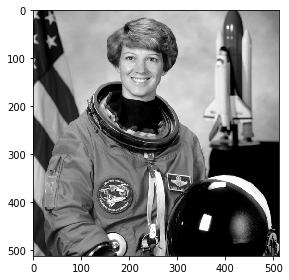

In [77]:
from skimage.color import rgb2gray
from skimage import data
img = data.astronaut()
img_gray = rgb2gray(img)
io.imshow(img_gray)
io.show()

**rgb2gray()** usa pesados no uniformes de canales, por la diferente sensitividad del ojo humano a diferentes colores. Por lo tanto, este tipo de pesado garantiza **preservación de luminosidad** de RGB a escala de grises

In [4]:
import numpy as np
from skimage import color
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2gray(red_pixel)

array([[0.2125]])

In [5]:
green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
color.rgb2gray(green_pixel)

array([[0.7154]])

### Invirtiendo imágenes

Una imágen invertida también se llama imágen complementaria. Para imágenes binarias, valores Verdaderos se convierten en Falsos y vice versa. Para imágenes en escala de girses, los valores de los pixeles es remplazado por la diferencia del valor máximo del tipo de dato y el valor actual. Para imágenes RGB, la misma operación es realizada para cada canal. Esta operación puede ser realizada con **skimage.util.invert()**:

/Users/jperalta/miniconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


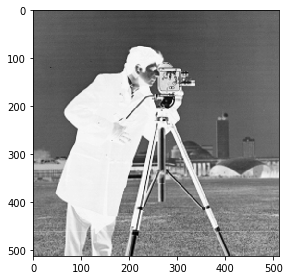

In [9]:
from skimage import util
from skimage import io
from skimage import data
img = data.camera()
inverted_img = util.invert(img)
io.imshow(inverted_img)
io.show()

### Pintando imágenes con etiquetas

**label2rgb()** puede ser usado para superimponer imágenes a color sobre imágenes en escala de grises usando un arreglo de etiquetas para codificar las regiones para representarse por el mismo color.

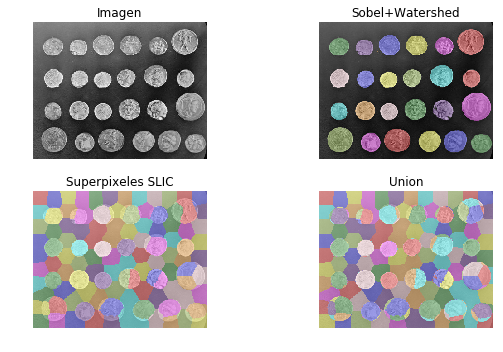

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage import data

coins = data.coins()

# hacer segmentación usando detección de bordes y watershed.
edges = sobel(coins)

# Identificar pixeles de fondo y frente por los valores de intensidad.
# Estos pixeles se usan como semillas para watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# Hacer segmentación usando superpixeles SLIC.
seg2 = slic(coins, n_segments=117, max_iter=160, sigma=1, compactness=0.75,
            multichannel=False)

# combinar ambas.
segj = join_segmentations(seg1, seg2)

# Mostrar las segmentaciones.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Imagen')

color1 = label2rgb(seg1, image=coins, bg_label=0)
ax[1].imshow(color1)
ax[1].set_title('Sobel+Watershed')

color2 = label2rgb(seg2, image=coins, image_alpha=0.5)
ax[2].imshow(color2)
ax[2].set_title('Superpixeles SLIC')

color3 = label2rgb(segj, image=coins, image_alpha=0.5)
ax[3].imshow(color3)
ax[3].set_title('Union')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

## Contraste y exposición

Los pixeles de imágenes pueden tomar valores determinados por el **dtipo** de la imágen (Ver [**Tipos de datos en imágenes y su significado**](#tpimg)), como 0 a 255 para **uint** o **\[0,1\]** para imágenes de punto flotante. Sin embargo, la mayoría de las imágenes tienen rangos más pequeños (por bajo contraste), o tienen la mayoría de los pixeles concentrados en un subrango de los valores accesibles. **skimage.exposure** provee funciones que mueven los valores de intensidad sobre un rango mayor.

Una primera clase de metodos calcula una funcion no linear de intensidades, que es independiente de los valores de los pixeles de una imágen específica. Estos métodos son usualmente usados para correccion de sensores no-lineales, o receptores como el ojo humano. Un ejemplo bien conocido es la **corrección Gama**, implementada en **adjust_gamma()**.

Otros métodos re-distribuyen los valores de pixeles de acuerdo al histograma de la imágen. El histograma de los valores de pixeles es calculado con **skimage.exposure.histogram()**:

In [15]:
from skimage import exposure
image = np.array([[1, 3], [1, 1]])
exposure.histogram(image)

(array([3, 0, 1]), array([1, 2, 3]))

**histogram()** regresa el número de pixeles para cada valor, y los centros de los valores. El comportamiento de **histrogam()** por lo tanto es ligeramente diferente del de **numpy.histogram()**, que regresa los limites de los valores.

El mejorador de contraste más simple **rescale_intensity()** consiste en estirar los valores de pixeles al rango comleto permitido, usando una trasnformación lineal

(10, 197)


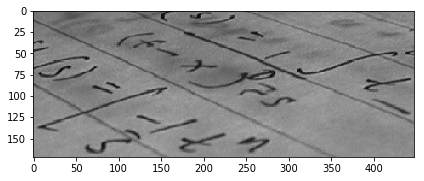

In [25]:
from skimage import exposure
text = data.text()
print(text.min(), text.max())
io.imshow(text)
io.show()

(0, 255)


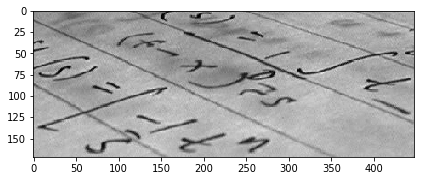

In [26]:
better_contrast = exposure.rescale_intensity(text)
print(better_contrast.min(), better_contrast.max())
io.imshow(better_contrast)
io.show()

Aun cuando una imágen usa el rango completo, a veces hay muy poco peso en los bordes del rango. En estos casos, cortar pixeles usando porcentajes de la imágen mejora el contraste (a costa de perdida de información, por que algunos pixeles son saturados por esta operación):

(10.0, 186.0)


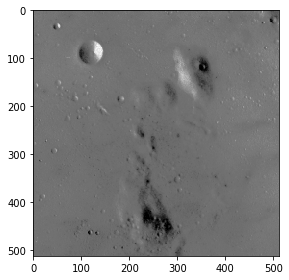

In [29]:
moon = data.moon()
v_min, v_max = np.percentile(moon, (0.2, 99.8))
print(v_min, v_max)
io.imshow(moon)
io.show()

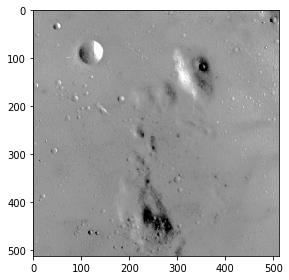

In [28]:
better_contrast = exposure.rescale_intensity( moon, in_range=(v_min, v_max))
io.imshow(better_contrast)
io.show()

La función **equalize_hist()** mapea la función de distribución cumulativa (cdf) de los valores de pixeles a una cdf lineal, garantizando que todas laspartes del rango tonal son representadas de igual manera en la imágen. Como un refinamiento mayor, la equalización del histograma puede ser realizada en subregiones de la imágen por **equalize_adapthist()**, para corregir gradientes de exposición a traves de la imágen. 

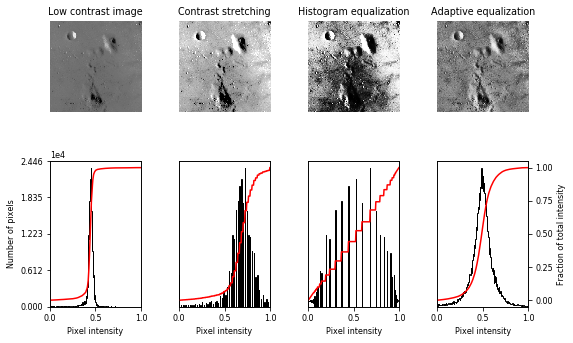

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Infraestructura de Plugins IO

Un plugin consiste en dos archivos, la fuente y el descriptor **.ini**. Digamos que queremos proveer un plugin para **imshow** usando **matplotlib**. Llamaremos nuestro plugin **mpl**:

```
skimage/io/_plugins/mpl.py
skimage/io/_plugins/mpl.ini
```

El nombre de los archivos **.py** y **.ini** debe corresponder. Dentro del archivo **ini**, damos el meta-data del plugin:

```
[mpl] <-- Nombre del plugin, puede ser cualquiera
description = I/O plugin de imágen Matplotlib
provides = imshow <-- una lista separada por comas
    una o más de imshow, imsave, imread, _app_show
```

La linea de "provices" lista todas las funciones que provee el plugin. Como nuestro plugin provee **imshow**, tendremos que declararlo dentro de **mpl.py**:

```python
# Esto es mpl.py

import matplotlib.pyplot as plt

def imshow(img):
    plt.imshow(img)
```

Nota que, por default, **imshow**, es no-bloqueadore, por lo que una función especial **_app_show** debe ser proveida para bloquear el GUI. Podemos modificar el plugir para proporcionarla así:

```
[mpl]
provides = imshow, _app_show
```

```python
# Esto es mpl.py

import matplotlib.pyplot as plt

def imshow(img):
    plt.imshow(img)
    
def _app_show():
    plt.show()
```

Cualquier plugin en el directorio **_plugins** es examinado automáticamente por **skimage.io** al importar.
Puedes listar todos los plugins en tu sistema:

In [31]:
import skimage.io as io
io.find_available_plugins()

{'fits': ['imread', 'imread_collection'],
 'freeimage': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'test': ['imsave',
  'imshow',
  'imread',
  'imread_collection',
  'imshow_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection']}

o solo los que están cargados:

In [32]:
io.find_available_plugins(loaded=True)

{'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection']}

Un plugin se carga usando el comando **use_plugin**:

In [33]:
import skimage.io as io
io.use_plugin('pil') #usa todas las capacidades de PIL

o

In [34]:
io.use_plugin('pil', 'imread') #usa solo la capacidade imread de PIL

Nota que, si más de un plugin proporciona cierta funcionalidad, el último plugin cargado es suado.

Para ver las capacidades de un plugin, usa **plugin_info**:

In [35]:
io.plugin_info('pil')

{'description': 'Image reading via the Python Imaging Library',
 'provides': 'imread, imsave'}

# Manejando archivos de video

A veces es necesario leer una sequencia de imágenes de un archivo de video estandar, como archivos .avi y .mov

En el contexto cientifico, usualemente es mejor evadir estos formatos a favor de un simple directorio de imágenes o un TIF multi-dimensional. Los formatos de video son deficiles de leer por partes, tipicamente no soportan acceso de cuadros aleatorio o buscados por metadatos, y usan compresion con perdida si no son configurados cuidadosamente. Pero los archivchivos de video son usados ampliamente y son faciles de compartir, entonces es conveniente estar equipado para poder leerlos y escribirlos cuando sea necesario.

Las herramientas para leer arhivos de video vaira en su facilidad de instalación y uso, su uso de disco y memoria, y su compatibiildad entre plataformas. Esta es una guía practica.

## Convirtiendo el video a una sequencia de imágenes

Como solución de una vez, la más simple, y forma más segura es convertir el video a una colección de archivos de imágenes sequencialmente numeradas, usualmente llamadas sequencia de imagenes. Luego los archivos de imágenes pueden ser leidos a una coleccion de imagenes por **skimage.io.imread_collection**. Convertir el video a cuadros puede hacerse de forma facil en [ImageJ](http://imagej.nih.gov/ij/), un programa multiplataforma con GUI de la comunidad de bio-imagenes, o [FFmpeg](https://www.ffmpeg.org/) una poderosa herramienta de la linea de comandos para manipular archivos de video.

En FFmpeg, el siguiente comando genera una imágen por cada cuadro del video. Los arhivos son enumerados son cinco digitos y con zeros a la izquierda.

```python
ffmpeg -i "video.mov" -f image2 "video-frame%05d.png"
```
Generar sequencias de imágenes tiene desventajas: pueden ser grandes y dificiles de manejar, y generarlas puede tomar algo de tiempo. Es generalmente preferible trabajar directamente con el archivo de video original. Para una solución más directa, necesitamos ejecutar FFmpeg o LibAV desde Python para leer los cuadros del video. FFmpeg y LibAV son dos proyectos open-source grandes que pueden decodificar video de la gran variedad de formatos usados. Hay varias formas de usarlos desde Python. Desafortunadamente, cada una tiene sus desventajas

## PyAV

**PyAV** usa las librerías de FFmpeg (o LibAV) para leer los datos de imágenes directamente del archivo de video. Los llama usando enlaces de Cython, por lo que es muy rápido

In [36]:
%%script false
import av
v = av.open('direccion/al/video.mov')

El API PyAV refleja la forma en la que los cuadros son guardados en un archivo de video.

```python
for packet in container.demux():
    for frame in packet.decode():
        if frame.type == 'video':
            img = frame.to_image()  # PIL/Pillow image
            arr = np.asarray(img)  # arreglo numpy
            # Haz algo!
```

Recientemente,  los **paquetes conda** (con **recetas publicas** para PyAV y sus dependecias) se hizo disponible para OSX y Linux.

```python
conda install -c danielballan pyav
```

## Agregando acceso aleatorio a PyAV
La clase Video en **PIMS** invoca a PyAV y agrega funcionalidad para resolver problemas comunes en aplicaciones científicas, accesando un video por numero de cuadro. Los formatos de video están diseñados para ser buscados en forma aproximada, por tiempo, y no soportan formas eficientes de hacer busquedas por cuadros específicos. PIMS agrega la funcionalidad faltante decodificando (pero no leyendo) el video completo y creando una table de contenidos interna que soporta indexado por cuadros

```python
import pims
v = pims.Video('path/to/video.mov')
v[-1]  # a 2D numpy array representing the last frame
```

## MoviPy
**MoviePy** llama a FFmpeg a traves de un subproceso, manda el video decodificado de FFmpeg a la RAM, y lo lee. Este método es simple, pero pude ser frágil, y no es funcional para videos grandes que exceden la RAM disponible. Funciona en todas las plataformas si FFmepg está instalado. Ya que no usa las librerías internas de FFmpeg es más fácil de instalar, pero el **doble de lento**.

```python
from moviepy.editor import VideoFileClip
myclip = VideoFileClip("some_video.avi")
```

## Imageio
**Imageio** toma el mismo metodo que MoviePy. También soporta un amplio rango de otros formatos de imágen.

```python
import imageio
filename = '/tmp/file.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')

for num, image in vid.iter_data():
    print(image.mean())

metadata = vid.get_meta_data()
```
## OpenCV
Finalmente, otra solución es la clase **VideoReader** en OpenCV, que tiene llamadas a FFmpeg. Si necesitas OpenCV por otra razón, entonces es la mejor opción. Sin embargo, OpenCV puede ser dificil de instalar, especialmetne por que debe ser ligado a FFmpeg para poder leer archivos de video.

# Tutoriales
## Segmentación de imágenes
La segmentación de imágenes es la tarea de etiquetar los pixeles de objetos de interes en una imágen.

En este tutorial, veremos como segmentar objetos de un fondo. usaremos la imágen **coins** de **skimage.data**. Esta imágen muestra multiples monedas contra un fondo más obscuro. La segmentación de las monedas no puede hacerce directamente del histograma de los valores de grises, por que el fondo comparte suficietes valores de grises con las monedas que una segmentación por umbral no es suficiente.

In [1]:
import numpy as np
from skimage import io
from skimage import data
coins = data.coins()
histo = np.histogram(coins, bins=np.arange(0, 256))
io.imshow(coins)
io.show()

/Users/jperalta/miniconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


Simplemente umbralizar la imágen hace que perdamos parte significativa de ls monedas o que mezclemos partes del fondo con las monedas. Esto es por la luz no homogenea de la imágen.

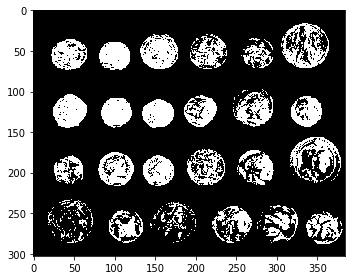

In [2]:
coins = data.coins()
thresh = coins > 150
coins[:] = 0
coins[thresh] = [255]
io.imshow(coins)
io.show()

Una primera idea sería usar contraste locar, es decir, usar gradientes en lugar de valores de grises.

## Segmentación por bordes

Intenemos primero encontrar los bordes que rodean a las monedas. Para la detección de bordes, usaremos el **detector de Canny** de **skimage.feature.canny**

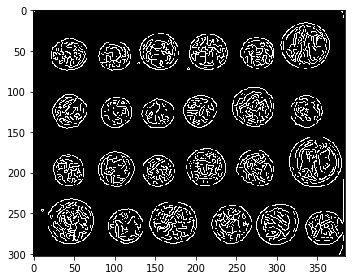

In [3]:
coins = data.coins()
from skimage.feature import canny
edges = canny(coins/255.)
io.imshow(edges)
io.show()

Como el fondo es muy suave, casi todos los bordes se encuentran alrededor de las monedas o dentro de ellas.

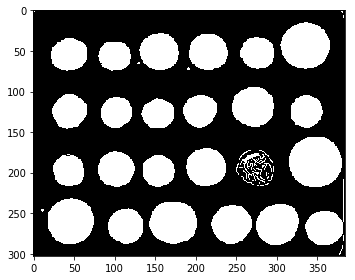

In [4]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
io.imshow(fill_coins)
io.show()

La mayoría de las monedas están bien segmentadas del fondo. Los pequeños objetos del fondo pueden ser removidos usando la función **ndi.label** para remover objetos más pequeños que cierto umbral.

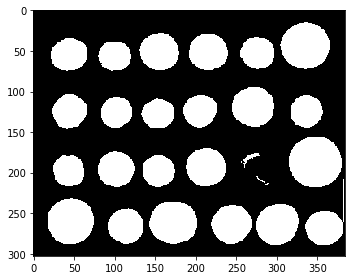

In [5]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]
io.imshow(coins_cleaned)
io.show()

Sin embargo, la segmentación no es muy satisfactoria ya que una de las monedas no ha sido segmentada correctamente. La razon es que el contorno que obtuvimos con el detector de Canny no estaba completamente cerrado, por lo que la funcion de llenado no lleno la parte interna de la moneda.

Por lo tanto, este metodo de segmentación no es muy robusto: si nos falta un solo pixel del contorno del objeto no podremos llenarlo. Podríamos delinear los contornos para cerrarlos. Pero, es preferible intentar un metodo más robusto.

## Segmentación por regiones


Determinemos primero marcadores de las monedas y el fondo. Estos marcadores son pixeles que se pueden etiquetar sin ambiguedad como objeto o fondo. Aqui, los carcadores se encuentran en las partes extremas del hisograma de valores de grises:

In [7]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

Usaremos estos marcadores en una segmentación watershed. El nombre watershed viene de una anología con hidrología. La **transformada watershed** inunda una imágen de elevación empezando de los marcadores, para determinar las llanuras de estos marcadores. Las lineas watershed separan estas llanuras y corresponden a la segmentación deseada.

La selección del mapa de elevación es critico para una buena segmentación. Aquí, la amplitud del gradiente provee un buen mapa de elevación. Usamos el operador Sobel para calcular la amplitud del gradiente:

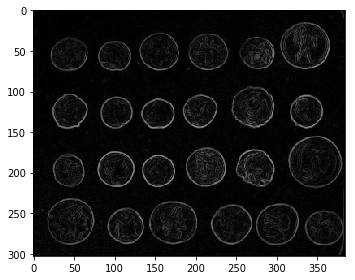

In [24]:
from skimage.filters import sobel
coins = data.coins()
elevation_map = sobel(coins)
io.imshow(elevation_map)
io.show()

El siguiente paso es encontrar los marcadores del fondo y las monedas basandonos en las partes extremas del histograma de valores de grises:

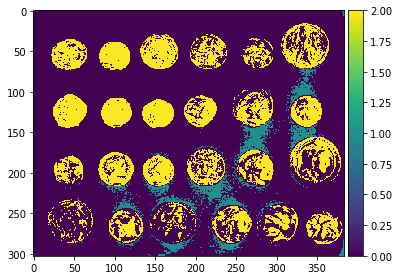

In [41]:
coins = data.coins()
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
io.imshow(markers)
io.show()

Calculemos la trasnformada watershed

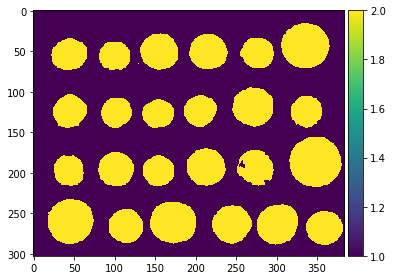

In [42]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)
io.imshow(segmentation)
io.show()

Con este método, el resultado es satisfactorio para todas las monedas. Aun que los marcadores para el fondo no estaban bien distribuidos, las barreras en el mapa de elevación estaban suficientemente altas para que los marcadores inundaran todo el fondo.

Removeremos algunos oyos con morfología matemática

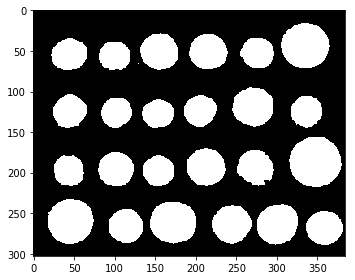

In [43]:
segmentation = ndi.binary_fill_holes(segmentation - 1)
io.imshow(segmentation)
io.show()

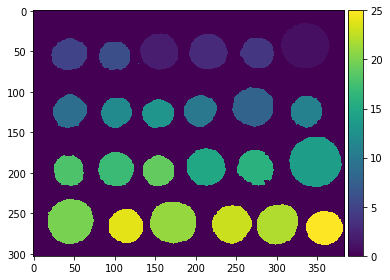

In [44]:
labeled_coins, _ = ndi.label(segmentation)
io.imshow(labeled_coins)
io.show()

# Como paralelizar ciclos

En procesamiento de imágenes, fecuentemente aplicamos el mismo algoritmo en un grupo grande de imágenes. En este parrafo, proponemos **joblib** para paralelizar ciclos. Aqui está un ejemplo de uno de estos trabajos:

In [49]:
from skimage import data, color, util
from skimage.restoration import denoise_tv_chambolle
from skimage.feature import hog

def task(image):
    """
    Apply some functions and return an image.
    """
    image = denoise_tv_chambolle(image[0][0], weight=0.1, multichannel=True)
    fd, hog_image = hog(color.rgb2gray(image), orientations=8,
                        pixels_per_cell=(16, 16), cells_per_block=(1, 1),
                        visualize=True)
    return hog_image


# Prepare images
hubble = data.hubble_deep_field()
width = 10
pics = util.view_as_windows(hubble, (width, hubble.shape[1], hubble.shape[2]), step=width)

Para llamar la función **task** en cada uno de los elementos de la lista **pics**, es común escrubir un ciclo for. Para medir el tiempo de ejecución puedes usar iphython y medir el tiempo de ejecución con **%timeit classic_loop**:

```python
def classic_loop():
    for image in pics:
        task(image)


%timeit classic_loop()
```

Otro método equivalente es usar una lista de comprensión que tiene la misma eficiencia.

```python
def comprehension_loop():
    [task(image) for image in pics]

%timeit comprehension_loop()
```

**joblib** es una librería que proporciona una forma fácil de paralelizar ciclos una vez que tenemos una lista de comprensión. EL número de trabajos puede ser especificado.

In [52]:
from joblib import Parallel, delayed
def joblib_loop():
    Parallel(n_jobs=4)(delayed(task)(i) for i in pics)

%timeit joblib_loop()

ImportError: No module named joblib

# Visualizador de imágenes
## Guía Rápida

**skimage.viewer** proporciona un canvas basado en **matplotlib** para desplegar imágenes en un GUI basado en Qt, con la meta de facilitar la creación de editores interactivos. Puedes usarlo para simplemente desplegar una imágen

In [53]:
from skimage import data
from skimage.viewer import ImageViewer

image = data.coins()
viewer = ImageViewer(image)
viewer.show()

/Users/jperalta/miniconda2/lib/python2.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


[]

Por supuesto, puedes igual de fácil usar **imshow** de **matplotlib** (o alternativamente **skimage.io.imshow** que agrega soporte para multiples plugins-io) para mostrar imágenes. La ventaja de **ImageViewer** es que fácilmente puedes agregar plugins para manipular imágenes. Actualmente solo unos pocos plugins están implementados, pero es fácil escribir los tuyos. Antes de continuar veamos un ejemplo de como un plugin predefinido se agrega al visualizador.

In [54]:
from skimage.viewer.plugins.lineprofile import LineProfile

viewer = ImageViewer(image)
viewer += LineProfile(viewer)
overlay, data = viewer.show()[0]

Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


In [5]:
import skimage
from skimage.filters import denoise_tv_bregman
from skimage.viewer.plugins.base import Plugin

denoise_plugin = Plugin(image_filter=denoise_tv_bregman)

ImportError: cannot import name denoise_tv_bregman

In [6]:
from skimage.viewer.widgets import Slider
from skimage.viewer.widgets.history import SaveButtons

denoise_plugin += Slider('weight', 0.01, 0.5, update_on='release')
denoise_plugin += SaveButtons()

/Users/jperalta/miniconda2/lib/python2.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


NameError: name 'denoise_plugin' is not defined

In [7]:
viewer = ImageViewer(image)
viewer += denoise_plugin
denoised = viewer.show()[0][0]

NameError: name 'ImageViewer' is not defined